::: {.callout-note title="Colab Link"}

<center>

[Click here to **open in Colab**](https://colab.research.google.com/github/jpowerj/dsan5100-03/blob/main/writeups/lab-4-prep/DSAN5100_Lab_4_Prep.ipynb?authuser=1){target="_blank"}

</center>

If you are trying to **edit** this notebook in **Colab**, you'll also want to make sure to run the following code cell, which will install some global functions that we use in the course: mainly the `dsan_theme()` function, which just ensures that the plots you create have a standardized theme, (making it easier for us and the TAs to quickly understand what's going on in your plots)

If the `dsan_theme()` function still gives you trouble after running this, no worries. You can just comment out `dsan_theme()` anywhere you see it, and use the default `ggplot2` theme instead.

:::

In [98]:
if (Sys.getenv('COLAB_RELEASE_TAG') != '') {
    writeLines("Colab detected: sourcing DSAN R globals")
    library(devtools)
    source_url('https://raw.githubusercontent.com/jpowerj/dsan5100-03/main/_globals.r')
} else {
    writeLines("No Colab environment detected")
}

No Colab environment detected


Here, to prepare you for Lab 4, I'm going to walk you through generating data from a **distribution** via **simulation**, and then analyzing **properties** of this data (and therefore, if the data is sufficiently representative, properties of the distribution) by computing new pieces of information on the basis of the original data. Hopefully this helps drive the point home that **probability distributions** like the **Normal distribution** that we'll look at in this case are not arbitrarily, pulled out of thin air or out of the brain of some imaginative mathematician. Rather, they

1.   arise naturally out of patterns that we see in nature, and/or
2.   allow us to "encode" the information we have about the world as a distribution in some principled way.

In the latter case, I say "principled" in the sense that: we can "encode" information we have at some point in time as a particularly-suitable distribution and then, when we learn new information, we can **update** this distribution to reflect the new information, using **Bayes' rule** 🧐‼️🧐.

## The Drunkard's Walk

In class today I described one of the many **Data Generating Processes** that could give rise to **normally-distributed** data. It involved a simple **random walk**, where you imagine a person on a numberline at the point $x = 0$, and then imagine them flipping a coin repeatedly: when the coin comes up **Tails**, they move 1 unit to the **left**, and when the coin comes up **Heads** they move 1 unit to the **right**. This stochastic process can be visualized via the following diagram[^drunkard]:

![](images/random_walk.svg)

Here we can think of the "layers" (the vertical columns) in the diagram as representing the branching possibilities in each step: at time $t = 0$, before any coin flips have been carried out, there is only one possible **state** of the system: the person is at the point $x = 0$.

After a single time step, at time $t = 1$, there are now **two possible states** of the system: if the (single) coin flip came up **Tails** the person is at $x = -1$, and if it came up **Heads** the person is at $x = 1$.

Hopefully some general aspects and mathematical properties of this stochastic process immediately stand out:

* There are **two ways** we could describe a given **state** of this system at a time $t$:
  * First, we could describe the **history** of all choices that led to the current state: the node at the top of the $t = 2$ column, for example, could be represented as a vector $(L, L)$, corresponding to the fact that the person ended up at this state by moving left, then moving left again.
  * **Alternatively**, we could choose to only keep track of the person's **position** on the number line, dropping the information about their history (how they got there). If we choose this option, the state can be described by a **single number**: the $x$ coordinate of where the person is located at that time.
  * Notice how this second option "collapses" some of the nodes in the diagram down into a single state: for example, the three history vectors $()$ (the vector corresponding to the start node, where no moves have been made yet), $(L,R)$ and $(R,L)$, which are three different states under the first option, both represent the single state $x = 0$ if we use this option.
* The number of **possible** states (nodes) at each time step $t$ is just $2^t$. This comes from our **multiplication rule** from earlier in the semester: if we're making $n$ choices, where each choice involves choosing between $k$ alternatives, the total number of choice vectors (decisions for all $n$ choices) is $k^n$. Here we're making $t$ choices (one at each time step), choosing between $2$ alternatives each time (going left vs. going right), giving $2^t$ total choice vectors.

Now that we have an idea of some of the mathematical properties of this system, let's focus in on converting this into code!

First things first, we make sure to use R's `set.seed()` function to ensure **reproducibility** of our results across different runs of the notebook:

Your first intuition might be to create a variable `x` to keep track of the state, then create a loop that will run `N` times, updating the state each time through the loop. In data science world, it turns out that this approach is **very** inefficient (in terms of memory usage but also, more importantly, in terms of the time it will take to run the simulation). But, let's start with that and work our way towards the more efficient solution.

For concreteness, let's try to simulate a person following this procedure for `N` = 10 steps, where each coin flip is with a fair coin, with $\Pr(H) = 0.5$. I am forever infinitely mad about the fact that R does not come with built-in support for the Bernoulli distribution (literally the distribution that every single other possible discrete distribution is built on top of...), so instead of using `dbinom()` incorrectly like I did in class, I am instead going to import the `Rlab` library, which [**adds in** functions](https://www.rdocumentation.org/packages/Rlab/versions/4.0/topics/Bernoulli){target="_blank"} like `dbern()`, `rbern()`, etc., that are bafflingly absent from base-R:

In [1]:
library(Rlab)
t <- 0
x <- 0
writeLines(paste0("Starting state (t = ",t,"): x = ",x))
for (i in seq(from = 1, to = 10)) {
    writeLines(paste0("=====[ Step ",i," ]====="))
    # Flip coin
    flip_outcome <- rbern(1,0.5)
    writeLines(paste0("Coin flip outcome: ",flip_outcome))
    # Choose direction based on result
    direction <- ""
    if (flip_outcome == 0) {
        # Outcome = Tails
        direction <- "Left"
        x <- x - 1
    } else {
        # Outcome = Heads
        direction <- "Right"
        x <- x + 1
    }
    # And increment the time counter
    t <- t + 1
    writeLines(paste0("Moved ",direction))
    writeLines(paste0("New state (t = ",t,"): x = ",x))
}

# # Unique id for each person
# pid <- seq(1, num_people)
# pid_tib <- tibble(pid)
# pos_df <- tibble()
# end_df <- tibble()
#   all_steps <- t(replicate(num_people, sample(support, num_steps, replace = TRUE, prob = c(0.5, 0.5))))

Rlab 4.0 attached.



Attaching package: 'Rlab'


The following objects are masked from 'package:stats':

    dexp, dgamma, dweibull, pexp, pgamma, pweibull, qexp, qgamma,
    qweibull, rexp, rgamma, rweibull


The following object is masked from 'package:datasets':

    precip




Starting state (t = 0): x = 0
=====[ Step 1 ]=====
Coin flip outcome: 1
Moved Right
New state (t = 1): x = 1
=====[ Step 2 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 2): x = 0
=====[ Step 3 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 3): x = -1
=====[ Step 4 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 4): x = -2
=====[ Step 5 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 5): x = -3
=====[ Step 6 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 6): x = -4
=====[ Step 7 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 7): x = -5
=====[ Step 8 ]=====
Coin flip outcome: 0
Moved Left
New state (t = 8): x = -6
=====[ Step 9 ]=====
Coin flip outcome: 1
Moved Right
New state (t = 9): x = -5
=====[ Step 10 ]=====
Coin flip outcome: 1
Moved Right
New state (t = 10): x = -4


Technically, this code is sufficient to carry out our whole simulation, if we didn't care about memory/time considerations. For example, we could use it to write a `slow_simulation` function, that takes in `num_steps` as its argument, simulates this many steps of the process, and returns the resulting state. To avoid the function printing out all of the above information 100 times, which will make things run even more slowly, I will also add a `verbose` argument that is set to `FALSE` by default. This is good practice in some cases, software-engineering-wise, since if something goes wrong during a call to the function we can re-run the function with `verbose` set to be `TRUE` and see the same type of info we printed out above.

In [2]:
slow_simulation <- function(num_steps, verbose = FALSE) {
    t <- 0
    x <- 0
    if (verbose) {
        writeLines(paste0("Starting state (t = ",t,"): x = ",x))
    }
    for (i in 1:num_steps) {
        if (verbose) {
            writeLines(paste0("=====[ Step ",i," ]====="))
        }
        # Flip coin
        flip_outcome <- rbern(1,0.5)
        if (verbose) {
            writeLines(paste0("Coin flip outcome: ",flip_outcome))
        }
        # Choose direction based on result
        direction <- ""
        if (flip_outcome == 0) {
            # Outcome = Tails
            direction <- "Left"
            x <- x - 1
        } else {
            # Outcome = Heads
            direction <- "Right"
            x <- x + 1
        }
        # And increment the time counter
        t <- t + 1
        if (verbose) {
            writeLines(paste0("Moved ",direction))
            writeLines(paste0("New state: x = ",x))
        }
    }
    return(x)
}

It is usually good practice, once you've written a function like this, to test that it works for the simplest "corner cases" or "base cases": in this case, for example, we should quickly verify that it always produces the expected output $x = 0$ when we ask it for the result of the process after **zero steps**:

In [3]:
replicate(10, slow_simulation(0))

[1]  0 -2  0  0  0 -2  2  0  0  0

And alas, we have already found a **bug** in our implementation! It turns out that, unlike in Python or most other programming languages, using just the colon operator (`:`) can lead to some terrifying bugs,since if the number **after** the `:` is **less than** the number **before** the `:`, R will just start iterating **backwards** from the first number down to the second number:

In [4]:
5:-3

[1]  5  4  3  2  1  0 -1 -2 -3

This may seem inocuous, until you try to write a function like this which loops a specific number of times, and you try to support the case of running **zero** times. For example, if you use `1:n`, and you accept `n` as an argument to your function, you'll get a case like the following:

In [5]:
n <- 0
1:n

[1] 1 0

The takeaway is: if we want to be **fully careful**, and we want to make sure our function also produces the correct answer for **zero** steps, then we need to use R's `seq_len()` function! `seq_len(N)` can be used in a loop to ensure that R loops over a **sequence** from 1 to `N`, and always counts **up**, so we avoid this case:

In [6]:
slow_simulation <- function(num_steps, verbose = FALSE) {
    t <- 0
    x <- 0
    if (verbose) {
        writeLines(paste0("Starting state (t = ",t,"): x = ",x))
    }
    for (i in seq_len(num_steps)) {
        if (verbose) {
            writeLines(paste0("=====[ Step ",i," ]====="))
        }
        # Flip coin
        flip_outcome <- rbern(1,0.5)
        if (verbose) {
            writeLines(paste0("Coin flip outcome: ",flip_outcome))
        }
        # Choose direction based on result
        direction <- ""
        if (flip_outcome == 0) {
            # Outcome = Tails
            direction <- "Left"
            x <- x - 1
        } else {
            # Outcome = Heads
            direction <- "Right"
            x <- x + 1
        }
        # And increment the time counter
        t <- t + 1
        if (verbose) {
            writeLines(paste0("Moved ",direction))
            writeLines(paste0("New state: x = ",x))
        }
    }
    return(x)
}

Re-running our tests, to make sure it works as expected now even in the `N` = 0 case, we get:

In [7]:
replicate(10, slow_simulation(0))

[1] 0 0 0 0 0 0 0 0 0 0

There may still be issues, but now let's use this function to find the state of the system after `N` = 100 steps (we'll run it 3 times here, just to show how it can produces different outcomes each time it is re-run)

In [8]:
slow_simulation(100)

[1] -20

In [9]:
slow_simulation(100)

[1] 2

In [10]:
slow_simulation(100)

[1] -2

And we see that, repeating the process 4 times, the random-walker ended up at $x = -20$, $x = 2$, and $x = -2$ after 100 steps. From this (or from intuition from the diagram, or from thinking about the process in general), we could infer another fact: that the random-walker will end up at an **even-numbered coordinate** if they take an **even number of steps** (including 0 steps). By similar reasoning, if we run the process for an **odd** number of steps, the random-walker will end up on an **odd-numbered coordinate** (here we run for a few even and odd values, so you can start to see this general pattern):

In [17]:
slow_simulation(7)

[1] 3

In [18]:
slow_simulation(8)

[1] 4

In [19]:
slow_simulation(9)

[1] 5

In [20]:
slow_simulation(11)

[1] 1

In [21]:
slow_simulation(13)

[1] -1

Here we have to pause, because we have to take into account the fact that we really want to simulate this process for a **large number of people**, and a **large number of steps**, so that this loop-based approach is going to become super slow and unwieldy as we increase the number of people/steps.

So, let's think about how we could speed it up. Honestly, this can often be more of an art than a science, but it is genuinely so important, as it can mean the difference between your code finishing in a few seconds and finishing in a few hours.

For this problem, there are a number of ways you could arrive at a faster, more efficient approach, but for the sake of brevity I will cut to the chase and just mention that a **key property** we can use here is the fact that the **outcome after `N` steps**, regardless of how big `N` is, is really just a **sum of independently-generated 0/1 variables**!

We could derive this insight, for example, by recalling the above discussion about the two different ways to store the state of the system (storing just the value of $x$ vs. storing the entire history), and thinking about the **relationship between these two representations**:

* If we know the entire history of a random-walker, we could use that information to **figure out their position**, by just starting from $x = 0$ and following each of the steps recorded in their history vector.
* The converse isn't true, though: if we know that the random-walker is at $x = 0$, we cannot infer (at least, cannot infer with certainty) the **history** of states that led them to end up at that coordinate. As we already saw just in considering two time steps, for example, they could have arrived at $x = 0$ via the histories $()$, $(L,R)$, or $(R,L)$.

This insight becomes especially helpful if we think about how we could **encode** what we're currently writing as $R$ or $L$ in a more helpful way: leaping once again over lots of thinking about it, if we chose to instead encode a move **left** as the number $-1$, and a move **right** as the number $1$, suddenly we may be able to see the relationship between the full-history state space and the "collapsed" state space where we just keep track of $x$. We can write out some histories using this $-1$ or $1$ representation, then look at the $x$ value these histories produce, and try to see the pattern:

| History vector<br>(original) | History vector<br>(numeric representation) | Resulting values of $x$ |
| - | - | - |
| $()$ | $()$ | $x = 0$ |
| $(L,L,R)$ | $(-1, -1, 1)$ | $x = -1$ |
| $(L,R)$ | $(-1,1)$ | $x = 0$ |
| $(R,R,R,R)$ | $(1,1,1,1)$ | $x = 4$ |
| $(R,L,R,L,R,L)$ | $(1,-1,1,-1,1,-1)$ | $x = 0$ |

Do you see the pattern? Jumping to the punchline: by using the numeric representation of the history vector, we can immediately derive the **final position** of the random-walker by **summing up** the values of their history vector in this representation!

If it's still unclear why this is helpful, that's ok: it may be an appreciation that only comes from spending hours debugging hundreds of tiny little errors in C code that your professor/boss has asked you to optimize down to the individual-bits-of-RAM level 😛 But it will hopefully become a little more clear regardless once we compare the runtimes of our two approaches!

Let's use this sum-to-get-final-state insight to rewrite our code **without any loops**. The main thing left to figure out is: **how to generate a sequence of random values drawn uniformly from $\{-1, 1\}$?** We could approach this using the **discrete uniform distribution**, or we could approach this by transforming the **Bernoulli distribution** (which produces values in $\{0,1\}$) in a smart way. But, optimizing for laziness, we can do even less work: there is already a **name for this distribution** (of a random variable $X$ with equally-likely outcomes drawn from the support set $\mathcal{R}_X = \{-1,1\}$): it's called the **Rademacher Distribution**.

As with the Bernoulli distribution, base-R does not have a built-in function for generating random Rademacher-distributed variables, so instead we can use an implementation provided by the `extraDistr` library, a function named `rsign()` (since you can think about this distribution as determining a **random sign**: positive or negative). Let's use `rsign()` to rewrite our function so it just

1. Generates `num_steps` random numbers, each one representing a piece of the history vector, and then
2. **Sums them** to get our resulting $x$ value


In [27]:
# (Uncomment and run the following line if you
# don't have the extraDistr library installed)
#install.packages("extraDistr")

In [28]:
library(extraDistr)
faster_simulation <- function(num_steps, verbose = FALSE) {
    # Generate a history vector with length `num_steps`,
    # in the representation where every step is a coin
    # flip, but we record -1 for tails and 1 for heads
    history_vec <- rsign(num_steps)
    final_x <- sum(history_vec)
    return(final_x)
}

And now let's check that it works for the corner case we identified above:

In [30]:
replicate(10,faster_simulation(0))

[1] 0 0 0 0 0 0 0 0 0 0

And check that the values it generates still seem right, for non-corner-case values:

In [31]:
faster_simulation(100)

[1] 2

In [32]:
faster_simulation(100)

[1] -2

In [33]:
faster_simulation(100)

[1] 14

## Moving From Individual to Aggregated Simulation

Now that we have this new version of our function, we can maybe already see how much faster it runs than our first attempt (it will be even more clear once we use it to simulate more people/steps). There are a few ways to **measure the time** that it takes for R functions to run, but to me the easiest way (and you want it to be easy when you're spending hours and hours just trying to tweak the runtime of one function) is to use the `tictoc` library (not part of base-R): once you load this library using `library(tictoc)`, you literally just put `tic()` somewhere in your code, then `toc()` somewhere afterwards, and it measures the time that elapsed in between these two function calls:

In [36]:
# (Uncomment to install, if needed)
#install.packages("tictoc")

In [37]:
library(tictoc)
tic()
1 + 1
toc()

[1] 2

0.001 sec elapsed


So, let's use this library to measure how long it takes the two approaches to simulate 1 million steps of the process (for one person):

In [41]:
steps_to_simulate <- 1000000

In [52]:
# Our first attempt
tic()
slow_simulation(steps_to_simulate)
slow_sim_times <- toc()
slow_sim_elapsed <- as.numeric(slow_sim_times$toc - slow_sim_times$tic)
slow_sim_elapsed

[1] 374

1.539 sec elapsed


[1] 1.539

In [53]:
tic()
faster_simulation(steps_to_simulate)
fast_sim_times <- toc()
fast_sim_elapsed <- as.numeric(fast_sim_times$toc - fast_sim_times$tic)
fast_sim_elapsed

[1] 1220

0.012 sec elapsed


[1] 0.012

By dividing the elapsed times for the two approaches (which we'll be able to interpret since these are **ratio variables** 😉):

In [54]:
elapsed_ratio <- slow_sim_elapsed / fast_sim_elapsed
elapsed_ratio

[1] 128.25

We can see that, already (just for one person), the improved version using `sum()` runs 128 times faster than our original approach using a for loop 😳

We could optimize the move to **multiple people** even more, but even if we just keep the two implementations as they currently are, and use `replicate()` to repeat them 10 times (i.e., generate history vectors and results for 10 people instead of 1), the efficiency difference becomes even more pronounced: 

In [55]:
num_people <- 10

In [57]:
# Our first attempt, now for 10 people
tic()
replicate(num_people, slow_simulation(steps_to_simulate))
slow_sim_times <- toc()
slow_sim_elapsed <- as.numeric(slow_sim_times$toc - slow_sim_times$tic)
slow_sim_elapsed

[1]  -984   712  1304    98  -972 -1364   744 -1448  -578  -302

14.903 sec elapsed


[1] 14.903

In [58]:
tic()
replicate(num_people, faster_simulation(steps_to_simulate))
fast_sim_times <- toc()
fast_sim_elapsed <- as.numeric(fast_sim_times$toc - fast_sim_times$tic)
fast_sim_elapsed

[1]  814  560 -800  174  706 1094  330  708  -32 -544

0.072 sec elapsed


[1] 0.072

We now, in both cases, have simulated data for 10 people performing this random walk procedure, both equally valid in terms of our use to simulate [one of] the data-generating process[es] underlying the Normal Distribution. But the original approach takes about 15 seconds to generate this simulated data, while the second approach takes less than 1/10th of 1 second to generate the same amount of data 🤯

So, if this efficiency gap has convinced you[^efficiency], we can now drop the first approach and just use the faster version to start digging into the Normal Distribution!

## Simulating `N` Normally-Distributed Random Variables

Now that we have a function that will efficiently generate random variables for us, let's use it to generate a `tibble` in **tidy format**:

* Each row will correspond to **one** person,
* Each of these people will be given a **unique ID**, and
* Each column will represent one **property** of this person.

In this case, the property will be called `x_T`, and it will represent the person's position `x` after `T` steps, where `T` is some value we will choose (as a **hyperparameter** of our simulation).

So that we have a large enough dataset (the `N` value), and so that each person will be simulated for enough steps to make the resulting outcomes very close to Normally-distributed (the `T` value), let's set

* `N` (number of people) = 1 million
* `T` (number of time steps each person should run the process for) = 1000

In [60]:
tic()
N <- 100000
T <- 1000
x_T_vals <- replicate(N, faster_simulation(T))
toc()

0.948 sec elapsed


(Using `tic()` and `toc()` one last time, we see that it was able to generate the entire dataset, at least on my computer, in under a second!)

In [61]:
class(x_T_vals)

[1] "numeric"

And now, rather than the (numeric) vector format that the `replicate()` function has produced here, for the sake of **analyzing** this dataset let's store the data in a structured format as a `tibble`:

In [64]:
library(tibble)
x_tibble <- tibble(x_T=x_T_vals)
x_tibble |> head()

x_T
<dbl>
-42
-70
-18
30
26
32


Now, since in Lab 4 we ask you to simulate a "base" distribution, then simulate distributions **derived** by applying (mathematical) **transformations** (sum, product, max, min, etc.) to the base distribution, let's start by making a plot to see what our base distribution---in the form of our `x_tibble` dataset---looks like:

In [66]:
source("../../_globals.r")

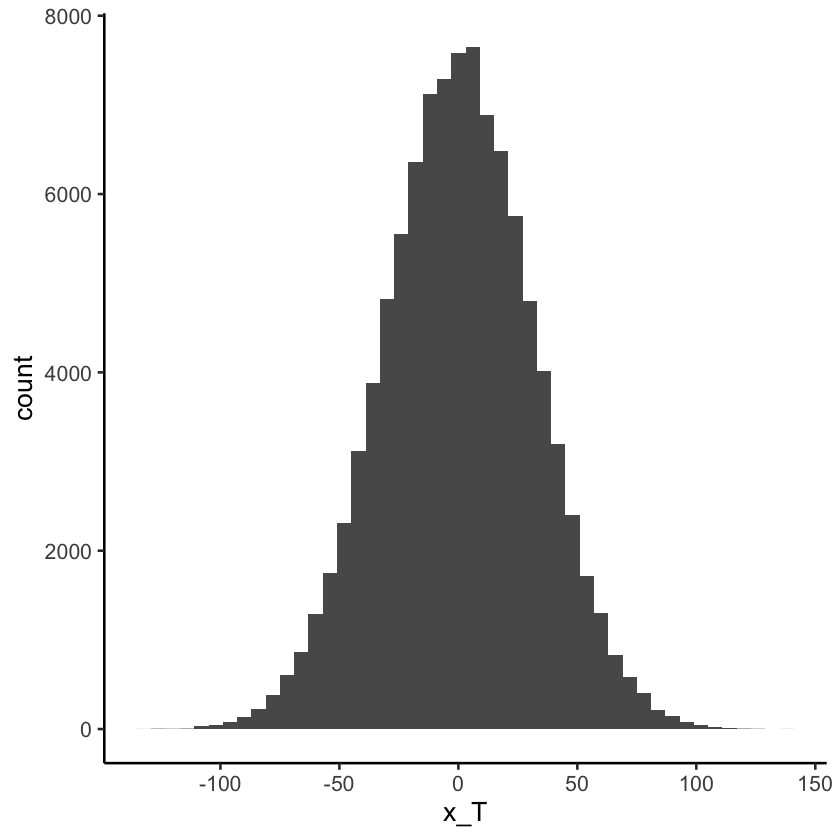

In [75]:
library(ggplot2)
ggplot(x_tibble, aes(x=x_T)) +
  geom_histogram(binwidth=6) +
  dsan_theme()

And... it should look familiar! It's our old friend the "bell curve"! We can see from the plot that the mean of this simulated data is probably something very close to 0, but the standard deviation is harder to figure out just from looking at the picture, so let's compute these directly from the data:

In [78]:
mu <- mean(x_tibble$x_T)
mu

[1] 0.15266

In [79]:
sigma <- sd(x_tibble$x_T)
sigma

[1] 31.69626

So the overall mean $\mu$ of the final positions of all 1 million people is about 0.153, while the overall standard deviation $\sigma$ is about 31.696. The mean has an intuitive interpretation, but we need to use the **68-95-99.7 Rule** to interpret the standard deviation as follows:

* Approximately **68%** of the data lies within the range $[\mu - 1\cdot \sigma, \mu + 1 \cdot \sigma]$, which in our case is

In [81]:
c(mu - sigma, mu + sigma)

[1] -31.54360  31.84892

* Approximately **95%** of the data lies within the range $[\mu - 2\cdot \sigma, \; \mu + 2 \cdot \sigma]$, which in our case is

In [82]:
c(mu - 2 * sigma, mu + 2 * sigma)

[1] -63.23986  63.54518

* Approximately **99.7%** of the data lies within 3 standard deviations of the mean, that is, within the range $[\mu - 3 \cdot \sigma, \; \mu + 3 \cdot \sigma]$, which in our case is

In [84]:
c(mu - 3 * sigma, mu + 3 * sigma)

[1] -94.93611  95.24143

Roughly, then, we can interpret this last fact as saying that **nearly all** (99.7%) of the random walkers will still remain within 100 units of their starting position, after 1000 steps.

## Applying Transformations to `x_T`

It may have seemed like overkill to take the length-1000000 vector we had and convert it into a 1000000-row `tibble`, since we only had one column. But now let's see why we did this: let's take this column of the raw (simulated) values of $x_T$ and use it to derive simulated values of **functions of $x_T$**.

For example, instead of analyzing the **positions**, perhaps in the context of our problem we only care about **how far away** the people end up from their starting point. In that case, what we really care about is not $x$ itself but $|x - 0| = |x|$, the **absolute distance** (on the numberline) of the person's final position from their starting position.

Now that you've seen how changing from a for-loop-based approach to a "vectorized" approach can vastly improve efficiency, I also want you to move your focus away from how these absolute distances could be computed using a *loop* and instead focus on how they could be computed using a **mathematical function** that could be applied to **an entire vector of data** (in this case, the vector that we get by pulling the `x_T` column out of the `tibble`). In this case hopefully this mathematical operation is clear: we just want to apply the **absolute value function** to the `x_T` column vector. So, here let's use the `mutate()` function from `dplyr` (part of the `tidyverse`) to create a **new column** in our `tibble` called `abs_dist`, computed on the basis of `x_T` and representing this absolute distance:

In [86]:
library(dplyr)
x_tibble <- x_tibble |> mutate(abs_dist = abs(x_T))
x_tibble |> head()


Attaching package: 'dplyr'


The following object is masked from 'package:Rlab':

    count


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




x_T,abs_dist
<dbl>,<dbl>
-42,42
-70,70
-18,18
30,30
26,26
32,32


And we see that, at least in the first six columns, our "pipeline" has successfully taken the absolute values of the `x_T` column: `-42` has been transformed to `42`, `-70` to `70`, and so on.

Now, just as we did above, we can plot the distribution of **this** data, which is not the "raw" (simulated) data but a **function** of the raw data, which forms its own distribution that may be **different** from the distribution of the original data:

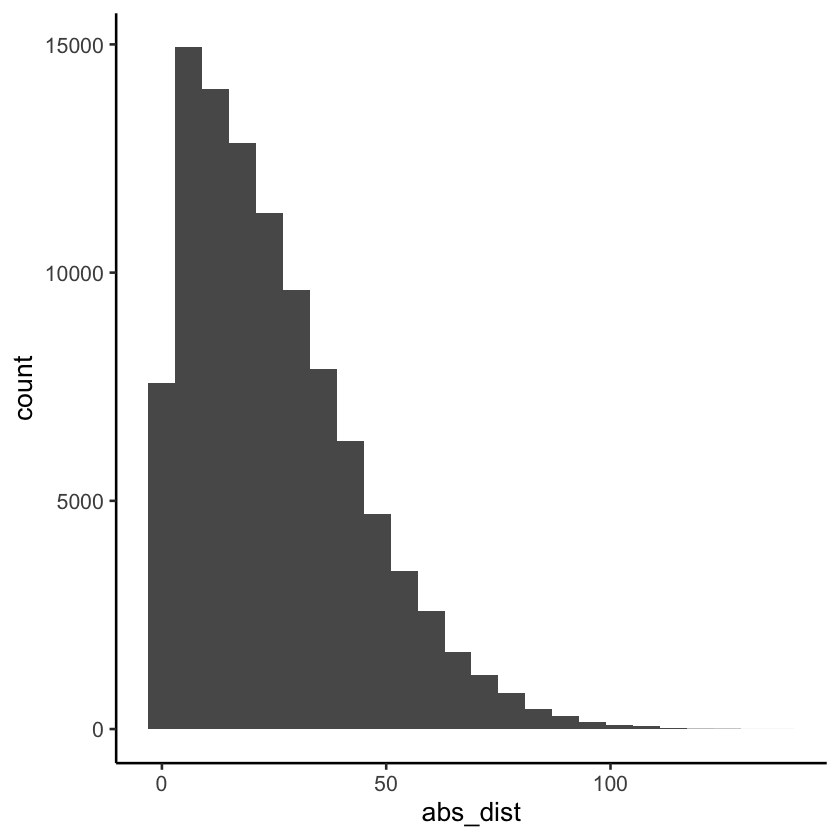

In [90]:
ggplot(x_tibble, aes(x = abs_dist)) +
  geom_histogram(binwidth=6) +
  dsan_theme()

Now that we've plotted two distributions using the `geom_histogram()` function from the `ggplot2` library, it's probably a good time to also mention how (like the warning messages from `ggplot2` will try to warn you) histograms can sometimes be more misleading than helpful when it comes to understanding your data: skipping over lots of details[^no-free-lunch], the way that the hisogram looks depends a good amount on the **bin width** or **number of bins** parameter, so that (a) it's good to examine the histogram of the distribution under **many different choices** for this bin width/number of bins, but also (b) it's good to check what the **kernel density** plot of the distribution looks like, as an alternative to the histogram: 

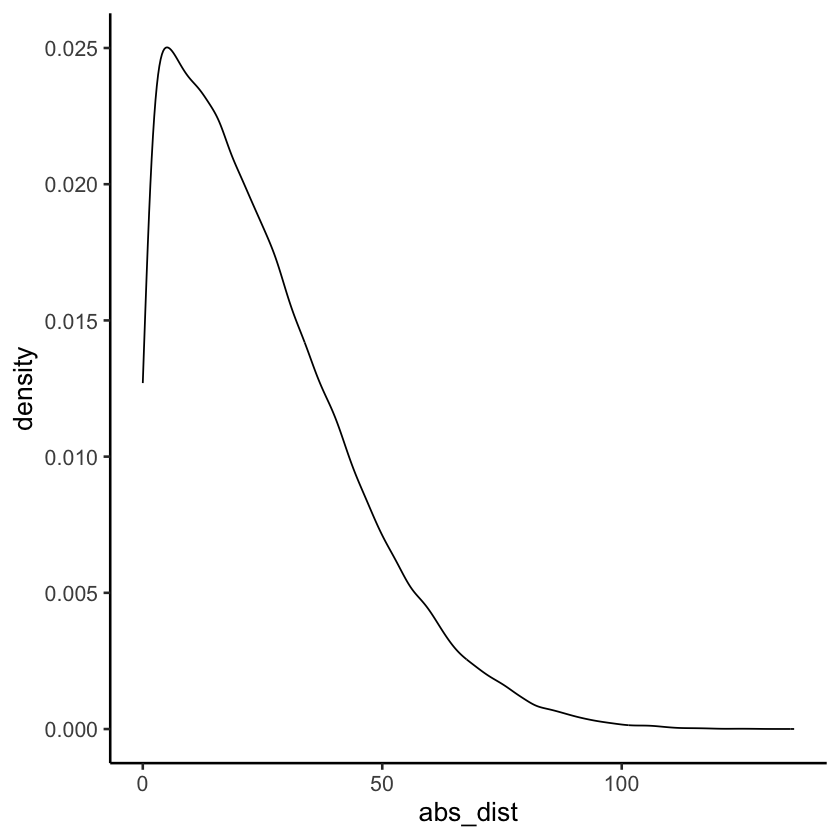

In [95]:
ggplot(x_tibble, aes(x = abs_dist)) +
  geom_density() +
  dsan_theme()

[^efficiency]: If it **still** hasn't convinced you, try doing what we did earlier with the number of steps, increasing it to 1 million, and do that with the number of people as well... You will be sitting at your computer for a while.

[^no-free-lunch]: They boil down to, "there's no such thing as a free lunch": if we abandon histograms and switch to some other visualization tool, that tool will have its own issues that we'll need to grapple with.